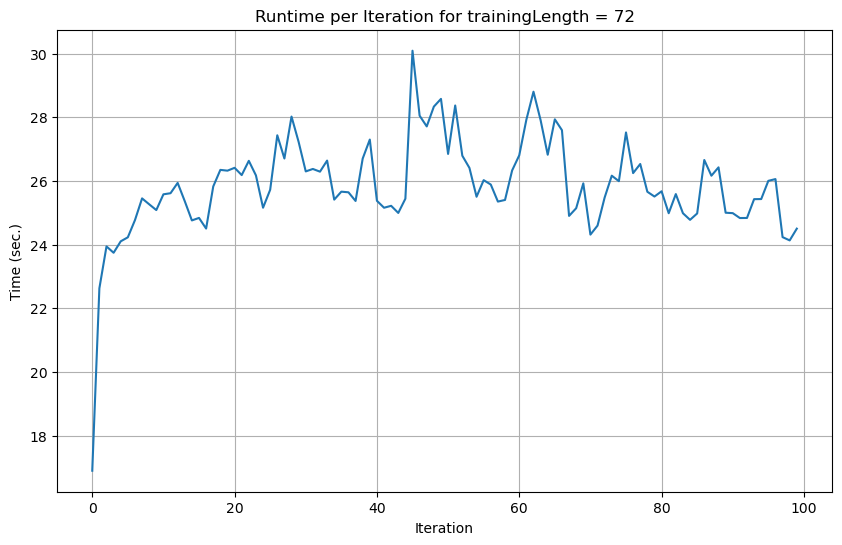

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import hamming

mat_filename = 'results/results_29.41.2025_1105.mat'
mat_data = scipy.io.loadmat(mat_filename)
zpost = mat_data['Zpost']
ypost = mat_data['Ypost']
rpost = mat_data['Rpost']
run_times = mat_data['runTimes'].flatten()

plt.figure(figsize=(10, 6))
plt.plot(run_times)
plt.title('Runtime per Iteration for trainingLength = 72')
plt.xlabel('Iteration')
plt.ylabel('Time (sec.)')
plt.grid(True)

In [2]:
mat_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Kmax', 'Rpost', 'SigmaCTpost', 'V', 'X', 'Ypost', 'Zpost', 'alpha', 'bAlpha', 'bBeta', 'burnIn', 'eps', 'lda', 'muCTpost', 'phi', 'runTimes', 'sigmaC', 'sigmaU', 'sigmaV', 'stepNo', 'trainingLength', 'wburn', 'wsample'])

In [3]:
mat_data["Rpost"]

array([[array([[0.37409908, 0.28418766, 0.59747468, 0.1510968 , 0.28455168,
                0.16954067, 0.4688053 , 0.5121038 ]])                      ,
        array([[0.48557531, 0.20426593, 0.47607395, 0.25533972, 0.50449632,
                0.57739696, 0.13431851, 0.26092922, 0.14340318, 0.03657039]]),
        array([[0.42862899, 0.27363535, 0.45540234, 0.43652904, 0.56663838,
                0.10482146, 0.08582254, 0.22064324, 0.19288668, 0.29413736]]),
        array([[0.41162058, 0.26873551, 0.48567146, 0.39748445, 0.48417983,
                0.09621934, 0.08723408, 0.2818388 , 0.28206154, 0.15157821]]),
        array([[0.47472294, 0.27097017, 0.45486736, 0.426543  , 0.46933103,
                0.10578895, 0.03434591, 0.09897832, 0.2372556 , 0.20569695,
                0.18635239]])                                              ,
        array([[0.5119359 , 0.16496769, 0.49514581, 0.40751224, 0.49199032,
                0.06884417, 0.02893725, 0.23933197, 0.24313771, 0.29501643]])

In [4]:
zpost_list = [np.array(z) for z in mat_data['Zpost'].squeeze()]

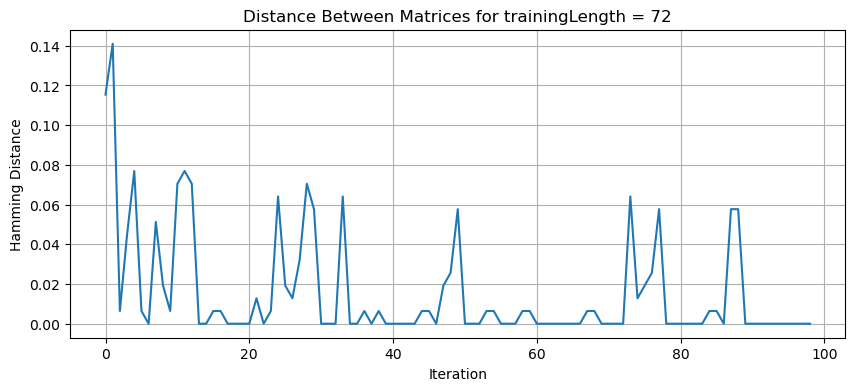

In [5]:
max_rows = max(z.shape[0] for z in zpost_list)
max_cols = max(z.shape[1] for z in zpost_list)

padded_zpost_list = [
    np.pad(z, ((0, max_rows - z.shape[0]), (0, max_cols - z.shape[1])), mode='constant', constant_values=0)
    for z in zpost_list
]

hamming_distances = [
    hamming(padded_zpost_list[i].flatten(), padded_zpost_list[i + 1].flatten())
    for i in range(len(padded_zpost_list) - 1)
]

plt.figure(figsize=(10, 4))
plt.plot(hamming_distances)
plt.title('Distance Between Matrices for trainingLength = 72')
plt.xlabel('Iteration')
plt.ylabel('Hamming Distance')
plt.grid(True)
plt.show()

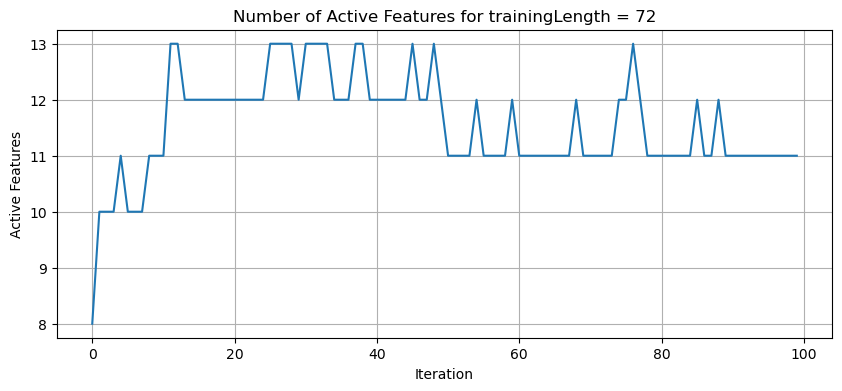

In [6]:
active_features = [np.sum(np.any(z, axis=0)) for z in zpost_list]

plt.figure(figsize=(10, 4))
plt.plot(active_features)
plt.title('Number of Active Features for trainingLength = 72')
plt.xlabel('Iteration')
plt.ylabel('Active Features')
plt.grid(True)
plt.show()

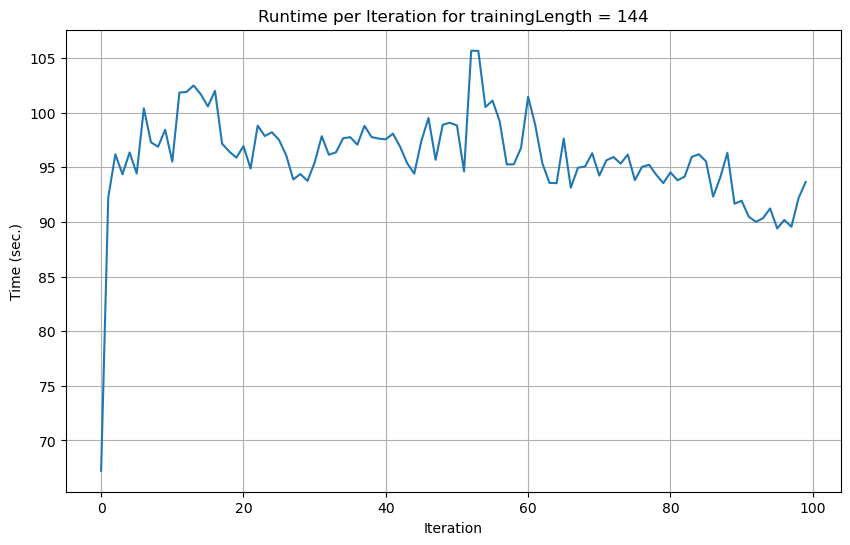

In [7]:
mat_filename = 'results/results_29.47.2025_1205.mat'
mat_data = scipy.io.loadmat(mat_filename)
zpost = mat_data['Zpost']
ypost = mat_data['Ypost']
rpost = mat_data['Rpost']
run_times = mat_data['runTimes'].flatten()

plt.figure(figsize=(10, 6))
plt.plot(run_times)
plt.title('Runtime per Iteration for trainingLength = 144')
plt.xlabel('Iteration')
plt.ylabel('Time (sec.)')
plt.grid(True)

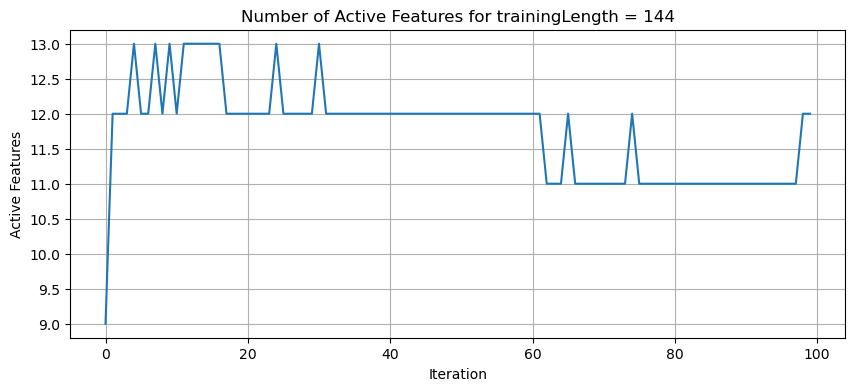

In [8]:
zpost_list = [np.array(z) for z in mat_data['Zpost'].squeeze()]

active_features = [np.sum(np.any(z, axis=0)) for z in zpost_list]

plt.figure(figsize=(10, 4))
plt.plot(active_features)
plt.title('Number of Active Features for trainingLength = 144')
plt.xlabel('Iteration')
plt.ylabel('Active Features')
plt.grid(True)
plt.show()

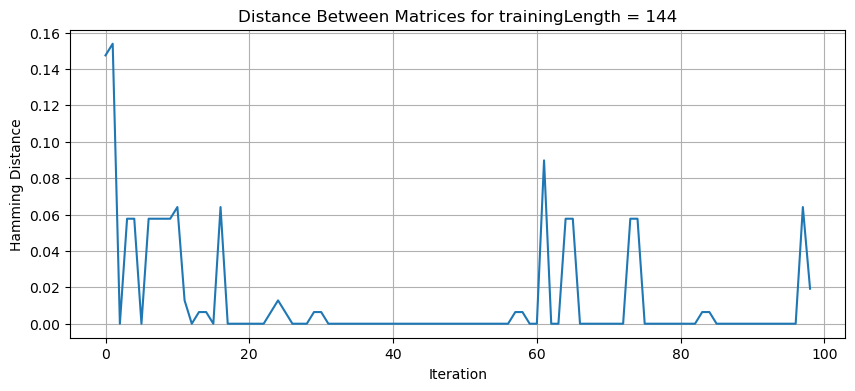

In [9]:
max_rows = max(z.shape[0] for z in zpost_list)
max_cols = max(z.shape[1] for z in zpost_list)
padded_zpost_list = [
    np.pad(z, ((0, max_rows - z.shape[0]), (0, max_cols - z.shape[1])), mode='constant', constant_values=0)
    for z in zpost_list
]

hamming_distances = [
    hamming(padded_zpost_list[i].flatten(), padded_zpost_list[i + 1].flatten())
    for i in range(len(padded_zpost_list) - 1)
]

plt.figure(figsize=(10, 4))
plt.plot(hamming_distances)
plt.title('Distance Between Matrices for trainingLength = 144')
plt.xlabel('Iteration')
plt.ylabel('Hamming Distance')
plt.grid(True)
plt.show()